In [3]:
%matplotlib inline
import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

import themepy
theme = themepy.Theme('paper')

import intro_plots as ip

rcParams['figure.dpi'] = 200
rcParams['font.family'] = 'Segoe Print'

In [4]:
fc = '#FEF7F9'
ec = '#f2f8fa'
ecolor = '#248EA6'
fcolor = '#E30B5C'
kcolor = '#021859'
scolor='C1'
pcolor = 'darkgray'
tcolor = 'dimgray'

In [5]:
E = ['temp', 'prcp', 'name']
V = ['x', 'y', 'color']
mosaic = [['E', 'V', 'V*', 'H'], 
          ['.', 'K', 'S', '.']]

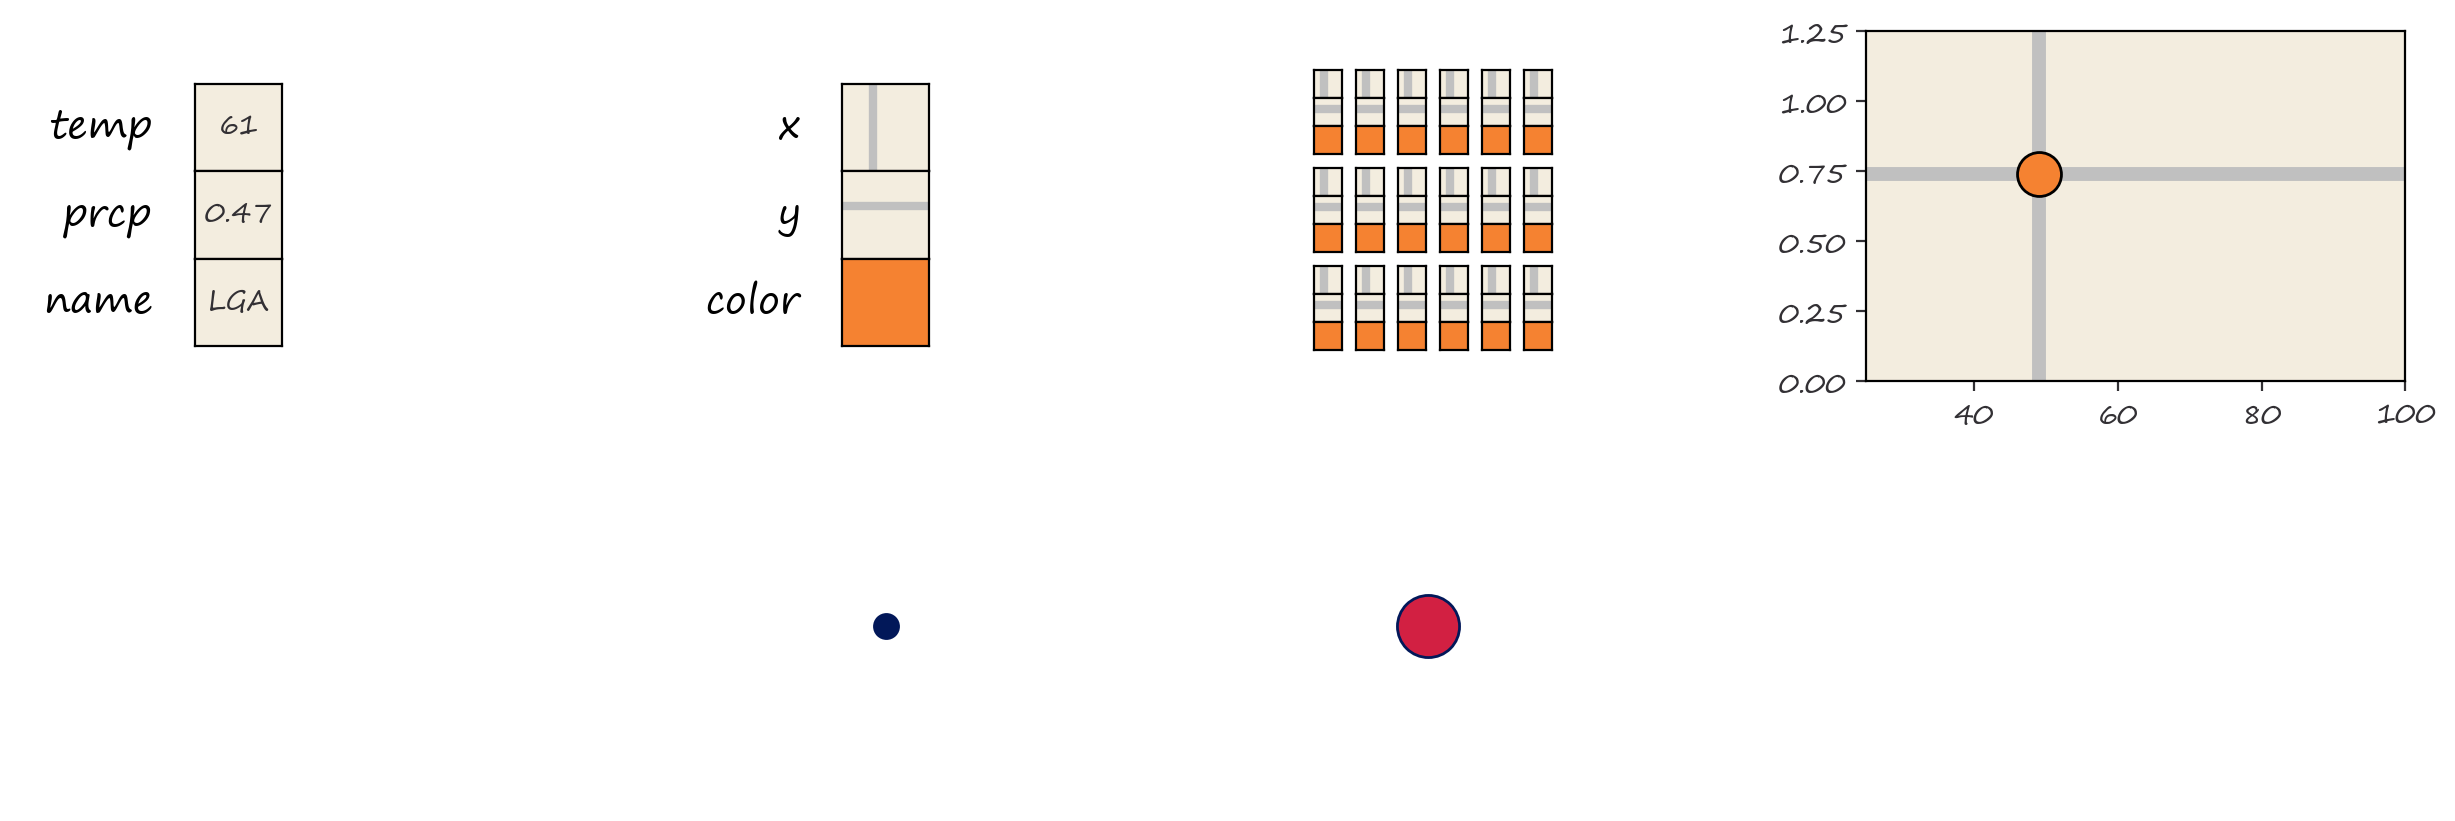

In [71]:
fig, axd = plt.subplot_mosaic(mosaic, figsize=(16,5), facecolor='white', gridspec_kw={'height_ratios':[1,1]})

for n in axd.keys():
    if n not in ['H']:
        axd[n].set_aspect('equal')
        axd[n].set(xlim=(0,1), ylim=(0,1))
        axd[n].axis('off')

        
posc='silver'
w = h = .25
x = .5
axsub = {}
for (n, C) in [('E',E), ('V', V)]:
    y = .6
    for c in C: 
        axsub[c] = axd[n].inset_axes([x,y,w,h], transform=axd[n].transData)
        #axsub[c].set_aspect("equal")
        axsub[c].set_ylabel(c, fontsize=14, rotation=0, labelpad=15, ha='right', va='center')
        axsub[c].set(xticks=[], yticks=[])
        y-=w

for (n, val) in [('temp', '61'), ('prcp', '0.47'), ('name', 'LGA')]:
    axsub[n].text(.5, .5, val, transform=axsub[n].transAxes, ha='center', va='center')
    
def vval(axes):
    axes['x'].axvline(.35, color=posc, lw=3)
    axes['y'].axhline(.6, color=posc, lw=3)
    axes['color'].set_facecolor(ip.cdict['NEW YORK LAGUARDIA AP'])
        
vval(axsub)
        
wm=hm=.08
for xm in np.arange(-0,.7,wm*1.5):
    for ym in np.arange(.25, 1, hm*3.5):
        axv = {}
        for c in V:
            axv[c] = axd['V*'].inset_axes([xm,ym,wm,hm], transform=axd['V*'].transData)
            axv[c].set(xticks=[], yticks=[])
            ym-=hm
        vval(axv)

axd['H'].scatter(49, .74, c=ip.cdict['NEW YORK LAGUARDIA AP'], ec='k', s=250, zorder=5)
axd['H'].axvline(49, lw=5, color=posc)
axd['H'].axhline(.74, lw=5, color=posc)
axd['H'].set(xlim=(25, 100), ylim=(0, 1.25))

axd['K'].scatter(.625, .5, s=75, c=kcolor)
axd['S'].scatter(.325, .5, s=500, facecolor=scolor, edgecolor=kcolor)
plt.show()

In [ ]:
x